In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve , precision_recall_curve

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [51]:
# Data Gathering
df = pd.read_csv("diabetes.csv")
df

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             50             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3        150             66             23       94  28.1   
4        150             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   52        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 8 columns]

In [52]:
# EDA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [53]:
df.describe()

Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  768.000000     768.000000     768.000000  768.000000  768.000000   
mean   121.117188      69.076823      20.536458   79.799479   31.992578   
std     31.805091      19.367794      15.952218  115.244002    7.884160   
min      0.000000       0.000000       0.000000    0.000000    0.000000   
25%     99.000000      62.000000       0.000000    0.000000   27.300000   
50%    117.000000      72.000000      23.000000   30.500000   32.000000   
75%    142.000000      80.000000      32.000000  127.250000   36.600000   
max    199.000000     122.000000      99.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.243490    0.348958  
std                    0.331329   11.758182    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   24.000000    0.000000  
50%                    0.372500   29.000000    0.000000  
75%                    0.626250   41.000000    1.000000  
max                    2.420000   81.000000    1.000000

In [54]:
# Checking for outliers

<AxesSubplot:xlabel='Glucose'>

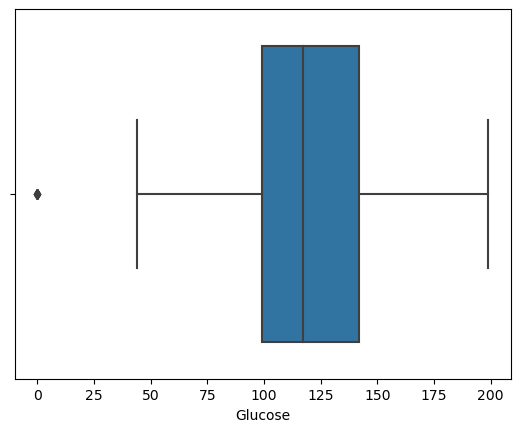

In [55]:
sns.boxplot(df["Glucose"])

In [56]:
sns.kdeplot(df["Glucose"])

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

In [57]:
iqr = (df["Glucose"].quantile(0.75)) - (df["Glucose"].quantile(0.25))
iqr

43.0

In [58]:
lower_tail = (df["Glucose"].quantile(0.25)) - 1.5*iqr
lower_tail

34.5

In [59]:
df["Glucose"] = np.where(df["Glucose"]< lower_tail,lower_tail,df["Glucose"])

In [60]:
sns.boxplot(df["Glucose"])

<AxesSubplot:xlabel='Glucose'>

<AxesSubplot:xlabel='BloodPressure'>

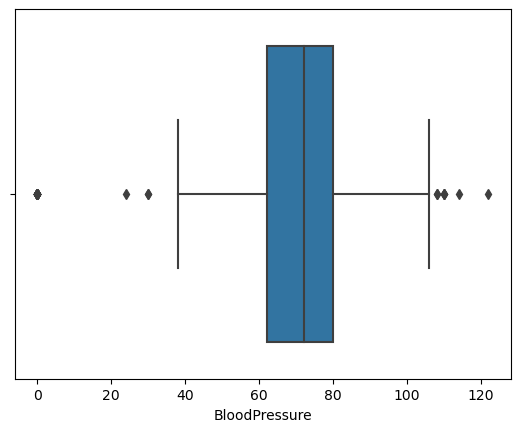

In [61]:
# BloodPressure
sns.boxplot(df["BloodPressure"])

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

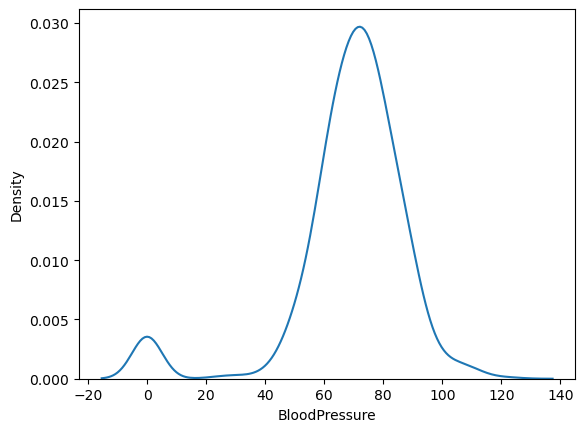

In [62]:
sns.kdeplot(df["BloodPressure"])

In [63]:
df[["BloodPressure"]].describe()

BloodPressure
count     768.000000
mean       69.076823
std        19.367794
min         0.000000
25%        62.000000
50%        72.000000
75%        80.000000
max       122.000000

In [64]:
iqr = (df["BloodPressure"].quantile(0.75)) - (df["BloodPressure"].quantile(0.25))
iqr

18.0

In [65]:
lower_tail = (df["BloodPressure"].quantile(0.25)) - 1.5*iqr
upper_tail = (df["BloodPressure"].quantile(0.75)) + 1.5*iqr
lower_tail

35.0

In [66]:
df["BloodPressure"] = np.where(df["BloodPressure"]<lower_tail, lower_tail,df["BloodPressure"])
df["BloodPressure"] = np.where(df["BloodPressure"]>upper_tail,upper_tail,df["BloodPressure"])

In [67]:
df["BloodPressure"]

0      50.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64

<AxesSubplot:xlabel='BloodPressure'>

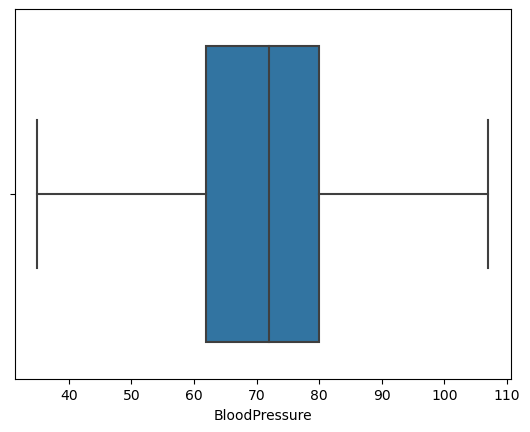

In [68]:
sns.boxplot(df["BloodPressure"])

In [69]:
# Skinthickness 
sns.boxplot(df["SkinThickness"])

<AxesSubplot:xlabel='SkinThickness'>

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

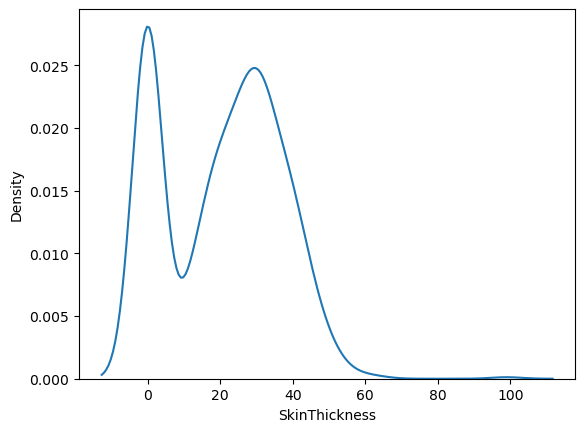

In [70]:
sns.kdeplot(df["SkinThickness"])

In [71]:
iqr = (df["SkinThickness"].quantile(0.75)) - (df["SkinThickness"].quantile(0.25))
uppertail = (df["SkinThickness"].quantile(0.75)) + 1.5*(df["SkinThickness"].quantile(0.75))
uppertail

80.0

In [72]:
 df["SkinThickness"] = np.where(df["SkinThickness"] > uppertail, uppertail,df["SkinThickness"] )

In [73]:
sns.boxplot(df["SkinThickness"])

<AxesSubplot:xlabel='SkinThickness'>

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    float64
 1   BloodPressure             768 non-null    float64
 2   SkinThickness             768 non-null    float64
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 48.1 KB


<AxesSubplot:xlabel='Insulin'>

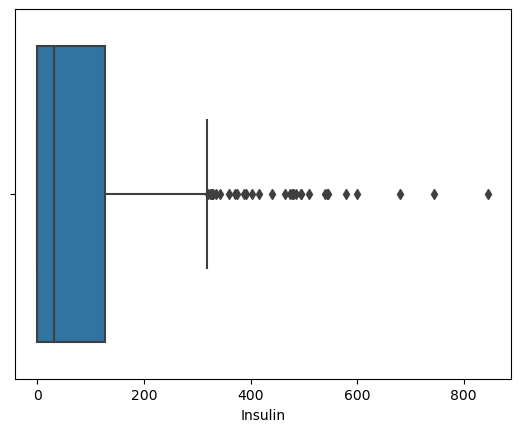

In [75]:
sns.boxplot(df["Insulin"])

In [76]:
sns.kdeplot(df["Insulin"])

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

In [77]:
iqr = df["Insulin"].quantile(0.75) - df["Insulin"].quantile(0.25)
upper_tail = df["Insulin"].quantile(0.75) + 3*iqr

upper_tail

509.0

In [78]:
# df["Insulin"] = np.where(df["Insulin"]> upper_tail, upper_tail,df["Insulin"])
# sns.boxplot(df["Insulin"])

In [79]:
df["Insulin"] = np.where(df["Insulin"]>upper_tail, upper_tail, df["Insulin"])

In [80]:
np.where(df["Insulin"]==509)

(array([  8,  13, 228, 247, 286, 409, 584, 655, 753], dtype=int64),)

In [81]:
sns.boxplot(df["Insulin"])

<AxesSubplot:xlabel='Insulin'>

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    float64
 1   BloodPressure             768 non-null    float64
 2   SkinThickness             768 non-null    float64
 3   Insulin                   768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


<AxesSubplot:xlabel='BMI'>

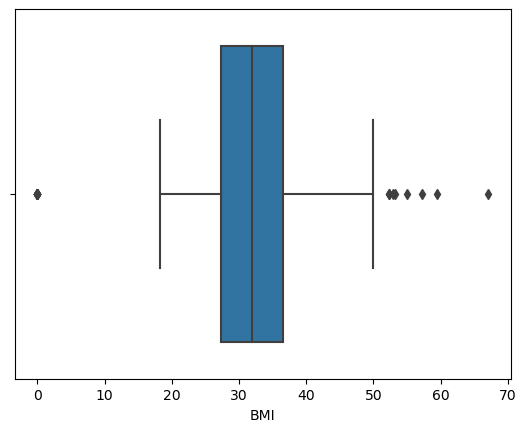

In [83]:
sns.boxplot(df["BMI"])

In [84]:
iqr = (df["BMI"].quantile(0.75)) - (df["BMI"].quantile(0.25))
lower_tail = df["BMI"].quantile(0.25) - 2*iqr

upper_tail = df["BMI"].quantile(0.75) + 2*iqr
upper_tail

55.2

In [86]:
lower_tail

8.7

In [49]:
# df["BMI"] = np.where(df["BMI"] < lower_tail, lower_tail,df["BMI"])
# df["BMI"] = np.where(df["BMI"]< upper_tail , upper_tail, df["BMI"])
# df["BMI"].value_counts()

55.2    765
67.1      1
59.4      1
57.3      1
Name: BMI, dtype: int64

In [87]:
df["BMI"].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    float64
 1   BloodPressure             768 non-null    float64
 2   SkinThickness             768 non-null    float64
 3   Insulin                   768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

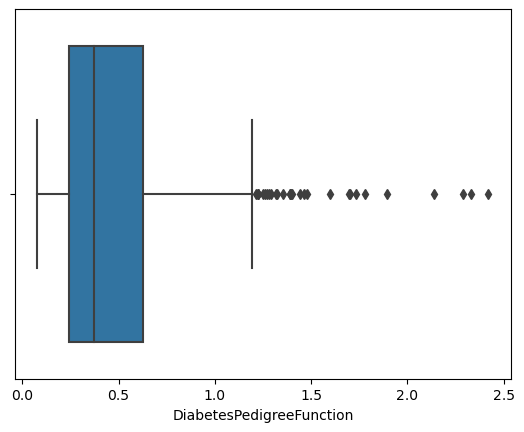

In [90]:
sns.boxplot(df["DiabetesPedigreeFunction"])

In [92]:
iqr = df["DiabetesPedigreeFunction"].quantile(0.75) - df["DiabetesPedigreeFunction"].quantile(0.25)
iqr

0.38249999999999995

In [94]:
upper_tail = df["DiabetesPedigreeFunction"].quantile(0.75) + 3*iqr
upper_tail

1.77375

In [95]:
np.where(df["DiabetesPedigreeFunction"]>upper_tail)

(array([  4,  45,  58, 228, 370, 445], dtype=int64),)

In [96]:
df["DiabetesPedigreeFunction"] = np.where(df["DiabetesPedigreeFunction"]>upper_tail, upper_tail, df["DiabetesPedigreeFunction"])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

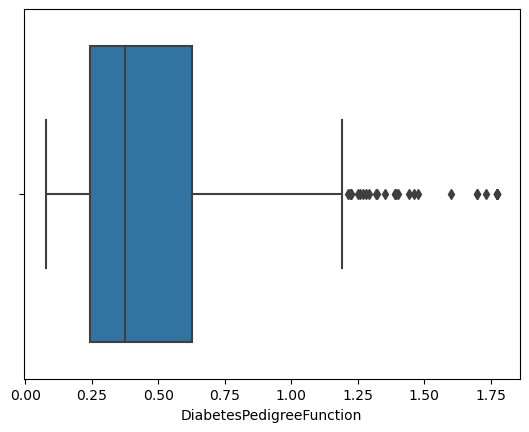

In [97]:
sns.boxplot(df["DiabetesPedigreeFunction"])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    float64
 1   BloodPressure             768 non-null    float64
 2   SkinThickness             768 non-null    float64
 3   Insulin                   768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


In [99]:
sns.boxplot(df["Age"])

<AxesSubplot:xlabel='Age'>

In [100]:
iqr = df["Age"].quantile(0.75) - df["Age"].quantile(0.25)

In [104]:
upper_tail = df["Age"].quantile(0.75) + 2*iqr

In [105]:
upper_tail

75.0

In [107]:
df["Age"]= np.where(df["Age"]>upper_tail, upper_tail, df["Age"])
df["Age"]

0      50.0
1      31.0
2      52.0
3      21.0
4      33.0
       ... 
763    63.0
764    27.0
765    30.0
766    47.0
767    23.0
Name: Age, Length: 768, dtype: float64

In [108]:
sns.boxplot(df["Age"])

<AxesSubplot:xlabel='Age'>

In [121]:
# Model Training 
x = df.drop('Outcome',axis = 1)
y = df['Outcome']


Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148.0           50.0           35.0      0.0  33.6   
1       85.0           66.0           29.0      0.0  26.6   
2      183.0           64.0            0.0      0.0  23.3   
3      150.0           66.0           23.0     94.0  28.1   
4      150.0           40.0           35.0    168.0  43.1   
..       ...            ...            ...      ...   ...   
763    101.0           76.0           48.0    180.0  32.9   
764    122.0           70.0           27.0      0.0  36.8   
765    121.0           72.0           23.0    112.0  26.2   
766    126.0           60.0            0.0      0.0  30.1   
767     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  
0                     0.62700  50.0  
1                     0.35100  31.0  
2                     0.67200  52.0  
3                     0.16700  21.0  
4                     1.77375  33.0  
..                        ...   ...  
763                   0.17100  63.0  
764                   0.34000  27.0  
765                   0.24500  30.0  
766                   0.34900  47.0  
767                   0.31500  23.0  

[768 rows x 7 columns]

In [122]:
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 18, stratify = y)

In [123]:
x_train

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
539    129.0           92.0           49.0    155.0  36.4   
756    137.0           90.0           41.0      0.0  32.0   
274    106.0           70.0            0.0      0.0  34.2   
576    108.0           44.0           20.0    130.0  24.0   
722    149.0           68.0           29.0    127.0  29.3   
..       ...            ...            ...      ...   ...   
6      150.0           50.0           32.0     88.0  31.0   
54     150.0           66.0           42.0    342.0  34.7   
99     122.0           90.0           51.0    220.0  49.7   
75      34.5           48.0           20.0      0.0  24.7   
417    144.0           82.0           32.0      0.0  38.5   

     DiabetesPedigreeFunction   Age  
539                     0.968  32.0  
756                     0.391  39.0  
274                     0.251  52.0  
576                     0.813  35.0  
722                     0.349  42.0  
..                        ...   ...  
6                       0.248  26.0  
54                      0.718  42.0  
99                      0.325  31.0  
75                      0.140  22.0  
417                     0.554  37.0  

[614 rows x 7 columns]

In [124]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [126]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [127]:
# Evaluation

y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [128]:
def evaluationmetrics(a,b):
    cnf_matrix = confusion_matrix(a,b)
    print("cnf_matrix is :\n", cnf_matrix)
    print("*"*80)
    accuracy = accuracy_score(a,b)
    print("The accuracy_score is :\n", accuracy)
    print("*"*80)
    clf_report = classification_report(a,b)
    print(clf_report)
    print("*"*80)
    
evaluationmetrics(y_pred,y_test)

cnf_matrix is :
 [[85 28]
 [15 26]]
********************************************************************************
The accuracy_score is :
 0.7207792207792207
********************************************************************************
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       113
           1       0.48      0.63      0.55        41

    accuracy                           0.72       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.75      0.72      0.73       154

********************************************************************************


In [129]:
y_pred_train = model.predict(x_train)
y_pred_train

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [130]:
evaluationmetrics(y_pred_train,y_train)

cnf_matrix is :
 [[353  87]
 [ 47 127]]
********************************************************************************
The accuracy_score is :
 0.7817589576547231
********************************************************************************
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       440
           1       0.59      0.73      0.65       174

    accuracy                           0.78       614
   macro avg       0.74      0.77      0.75       614
weighted avg       0.80      0.78      0.79       614

********************************************************************************


In [137]:
x_train.head(1).T

539
Glucose                   129.000
BloodPressure              92.000
SkinThickness              49.000
Insulin                   155.000
BMI                        36.400
DiabetesPedigreeFunction    0.968
Age                        32.000

array([1], dtype=int64)

In [153]:
# Prediction 

Glucose = 129.000
BloodPressure=92.000
SkinThickness=49.000
Insulin=155.000
BMI=36.400
DiabetesPedigreeFunction=0.968
Age=32.000

test_array = np.array([Glucose, BloodPressure, SkinThickness, Insulin, BMI,
       DiabetesPedigreeFunction, Age], ndmin = 2)

predicted_class = model.predict(test_array)[0]
if predicted_class == 0:
    print("Diabetes not Detected")
else:
    print("Diabetes Detected")

Diabetes not Detected


In [154]:
import pickle

with open("model_diabetes.pkl", "wb") as f:
    pickle.dump(model,f)